In [18]:
# setup shits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.signal import savgol_filter

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:

femur_raw = pd.read_csv('./xsens_euler/upper_arm.csv', skiprows=10)
tibia_raw = pd.read_csv('./xsens_euler/forearm.csv', skiprows=10)
femur_raw.columns = [i+"_femur" for i in femur_raw.columns]
tibia_raw.columns = [i+"_tibia" for i in tibia_raw.columns]
print(femur_raw.columns)

Index(['PacketCounter_femur', 'SampleTimeFine_femur', 'Euler_X_femur',
       'Euler_Y_femur', 'Euler_Z_femur', 'FreeAcc_X_femur', 'FreeAcc_Y_femur',
       'FreeAcc_Z_femur'],
      dtype='object')


In [20]:
combined_raw = femur_raw.merge(tibia_raw, how='outer', left_on='SampleTimeFine_femur', right_on='SampleTimeFine_tibia')
# print(combined_raw.head(40))
print(combined_raw.tail(1))
combined_raw.dropna(inplace=True)
print(combined_raw.tail(1))
combined_raw.to_csv('./xsens_euler/combined_arm.csv', index=False)

      PacketCounter_femur  SampleTimeFine_femur  Euler_X_femur  Euler_Y_femur  \
2043                 2044            1797585190       2.228796      58.577057   

      Euler_Z_femur  FreeAcc_X_femur  FreeAcc_Y_femur  FreeAcc_Z_femur  \
2043     166.174301         -0.05636        -0.057068         0.128181   

      PacketCounter_tibia  SampleTimeFine_tibia  Euler_X_tibia  Euler_Y_tibia  \
2043                 2044            1797585190     -46.433746      53.238926   

      Euler_Z_tibia  FreeAcc_X_tibia  FreeAcc_Y_tibia  FreeAcc_Z_tibia  
2043      94.787292         0.107787         0.734234         0.210768  
      PacketCounter_femur  SampleTimeFine_femur  Euler_X_femur  Euler_Y_femur  \
2043                 2044            1797585190       2.228796      58.577057   

      Euler_Z_femur  FreeAcc_X_femur  FreeAcc_Y_femur  FreeAcc_Z_femur  \
2043     166.174301         -0.05636        -0.057068         0.128181   

      PacketCounter_tibia  SampleTimeFine_tibia  Euler_X_tibia  Eul

[148.88714095477516, 148.85423252963557, 148.81896763918752, 148.80207891136905, 148.79614888658654, 148.78846334228118, 148.7661077228, 148.7494963100936, 148.7302021800877, 148.69030202642466, 148.6579550315128, 148.6263051496481, 148.59190734735927, 148.5679141054934, 148.5477023808598, 148.53575945550836, 148.5237571556959, 148.51314231643022, 148.4973210058824, 148.4801536216421, 148.4775388729692, 148.49294512305016, 148.51183729274433, 148.51537938068898, 148.5004894171583, 148.48199683527673, 148.45616550890114, 148.43270499529632, 148.4163991139354, 148.41744377927213, 148.3970289629294, 148.37162098923608, 148.35287347941494, 148.35154808507932, 148.34821524654603, 148.32967700333387, 148.3201837139026, 148.32234566015384, 148.32496259773055, 148.33751083517637, 148.3548522834896, 148.38726557324793, 148.455019559356, 148.53336672549054, 148.61571204028456, 148.66244847243433, 148.72750016915015, 148.776702415077, 148.83373864808505, 148.8917296665059, 148.92373510501926, 148

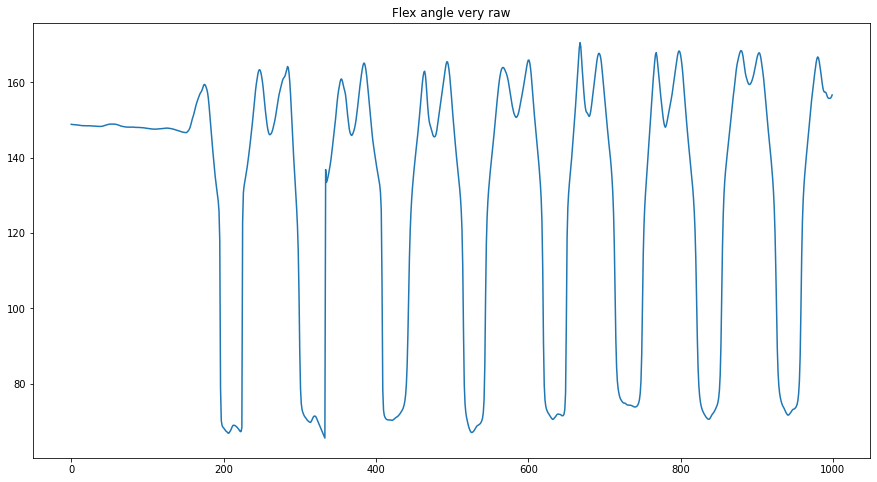

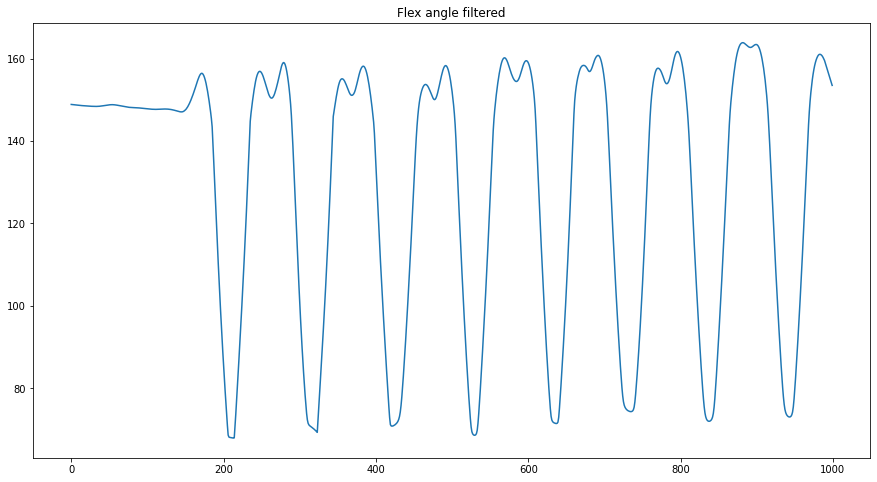

In [32]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

dot_prod = []

for row in range(1000):
#     data_row = combined_filter.iloc[row]
    data_row = combined_raw.iloc[row]
    femur_vec = np.array([data_row['Euler_X_femur'], data_row['Euler_Y_femur'], data_row['Euler_Z_femur']])
    tibia_vec = np.array([data_row['Euler_X_tibia'], data_row['Euler_Y_tibia'], data_row['Euler_Z_tibia']])

#     femur_vec = np.array([data_row['Euler_X_femur'], data_row['Euler_Y_femur']])
#     tibia_vec = np.array([data_row['Euler_X_tibia'], data_row['Euler_Y_tibia']])

#     femur_vec = np.array([data_row['FreeAcc_X_femur'], data_row['FreeAcc_Y_femur'], data_row['FreeAcc_Z_femur']])
#     tibia_vec = np.array([data_row['FreeAcc_X_tibia'], data_row['FreeAcc_Y_tibia'], data_row['FreeAcc_Z_tibia']])
    
    dot_prod.append(angle_between(femur_vec, tibia_vec))
    
    
flex_angle = [180- np.rad2deg(i) for i in dot_prod]
print(flex_angle)

plt.plot(flex_angle)
plt.title("Flex angle very raw")
plt.show()

flex_angle_filter = savgol_filter(flex_angle, 21, 1)
plt.plot(flex_angle_filter)
plt.title("Flex angle filtered")
plt.show()